In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [20]:
from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *

###############################################
# Construct the inital MathematicalProgram
###############################################
num_trajectories = 1
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      ic_list=None,
                      warm_start=True)


###############################################
# Add a neural network!
###############################################
# kNetConstructor = lambda: FC(2)
kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

In [21]:
# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(vis_ic_list=None)
mto.add_cost_and_constraint_printing_callback()

there are 2 cbs
 1

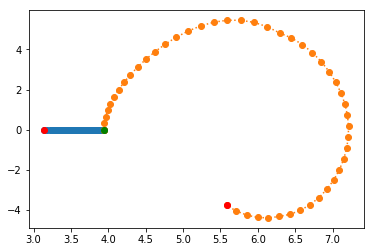

total cost:  0.00 | 	constraint -177.80 	bad 18, -178.57
 3total cost:  0.00 | 	constraint -177.80 	bad 18, -178.57
 5total cost:  1.45 | 	constraint -134.32 	bad 31, -134.44
 7total cost:  7.43 | 	constraint -107.99 	bad 31, -108.14
 9total cost:  7.42 | 	constraint -103.19 	bad 31, -103.34
 11total cost:  32.94 | 	constraint -24.19 	bad 31, -24.39
 13total cost:  30.33 | 	constraint -58.38 	bad 31, -58.58
 15total cost:  29.79 | 	constraint -67.88 	bad 31, -68.08
 17total cost:  27.61 | 	constraint -83.33 	bad 31, -83.53
 19total cost:  28.44 | 	constraint -74.64 	bad 31, -74.84
 21total cost:  26.53 | 	constraint -329.22 	bad 31, -329.42
 23total cost:  28.09 | 	constraint -76.18 	bad 31, -76.38
 25total cost:  26.75 | 	constraint -85.37 	bad 30, -85.53
 27total cost:  27.68 | 	constraint -78.72 	bad 31, -78.92
 29total cost:  27.98 | 	constraint -222.44 	bad 31, -222.64
 31total cost:  26.58 | 	constraint -88.67 	bad 31, -88.87
 33total cost:  24.12 | 	constraint -258.03 	bad 31, -

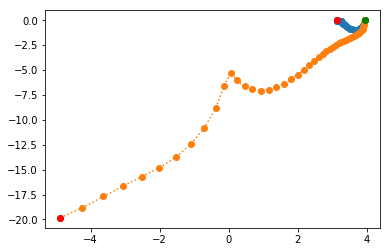

total cost:  24.66 | 	constraint -146.54 	bad 31, -146.74
 37total cost:  540.97 | 	constraint  1024.22 	bad 31,  1024.02
 39total cost:  23.51 | 	constraint -193.91 	bad 30, -194.21
 41total cost:  23.65 | 	constraint -204.39 	bad 30, -204.73
 43total cost:  23.57 | 	constraint -202.26 	bad 29, -202.63
 45total cost:  23.41 | 	constraint -207.28 	bad 29, -207.55
 47total cost:  23.19 | 	constraint -212.15 	bad 30, -212.22
 49total cost:  23.13 | 	constraint -211.74 	bad 29, -211.80
 51total cost:  23.10 | 	constraint -212.39 	bad 30, -212.43
 53total cost:  23.09 | 	constraint -211.17 	bad 29, -211.26
 55total cost:  23.10 | 	constraint -212.16 	bad 30, -212.21
 57total cost:  23.09 | 	constraint -212.45 	bad 30, -212.50
 59total cost:  23.08 | 	constraint -213.07 	bad 29, -213.16
 61total cost:  23.08 | 	constraint -212.76 	bad 29, -212.85
 63total cost:  23.07 | 	constraint -212.46 	bad 29, -212.53
 65total cost:  23.07 | 	constraint -212.18 	bad 29, -212.19
 67total cost:  23.07 | 

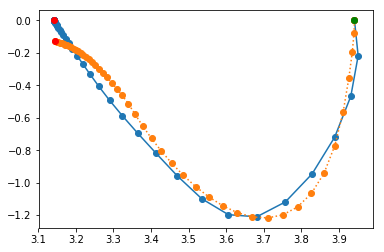

total cost:  23.07 | 	constraint -212.29 	bad 29, -212.31
 71total cost:  23.07 | 	constraint -212.35 	bad 29, -212.38
 73total cost:  23.07 | 	constraint -212.32 	bad 29, -212.34
 75total cost:  23.07 | 	constraint -212.36 	bad 29, -212.39
 77total cost:  23.07 | 	constraint -212.39 	bad 29, -212.42
 79total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
 81total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
 83total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
 85total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
 87total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
 89total cost:  23.07 | 	constraint -212.40 	bad 29, -212.43
SolutionResult.kSolutionFound


In [22]:
result = mto.Solve()
print(result)

In [23]:
ti = 0    
mto.print_pi_divergence(ti)

u_val-Pi(x_val)= diff
(-3.93)-(-4.03)=  0.10
(-4.93)-(-4.83)= -0.10
(-2.27)-(-2.37)=  0.10
(-1.00)-(-0.93)= -0.07
(-0.43)-(-0.33)= -0.10
(-0.19)-(-0.25)=  0.07
(-0.08)-(-0.18)=  0.10
(-0.03)-(-0.10)=  0.07
(-0.01)-( 0.01)= -0.02
(-0.01)-( 0.06)= -0.06
(-0.00)-( 0.08)= -0.08
(-0.00)-( 0.09)= -0.09
(-0.00)-( 0.10)= -0.10
( 0.00)-( 0.10)= -0.10
( 0.00)-( 0.10)= -0.10


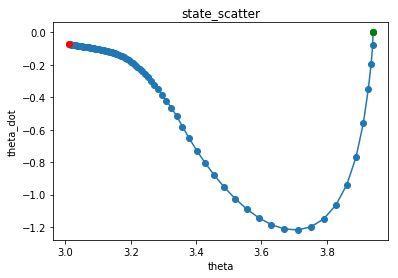

In [24]:
ti = 0
mto.plot_policy("state_scatter", ti)

In [30]:
ti = 0
mto.render_policy(ti)

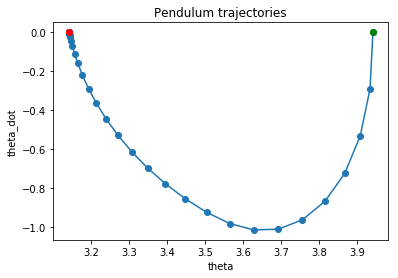

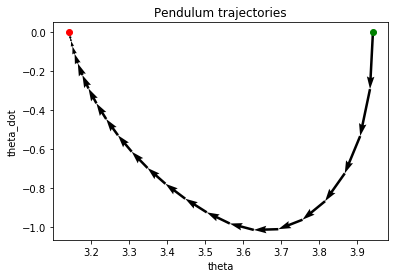

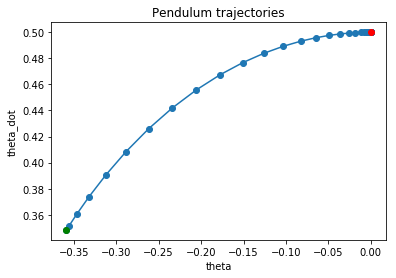

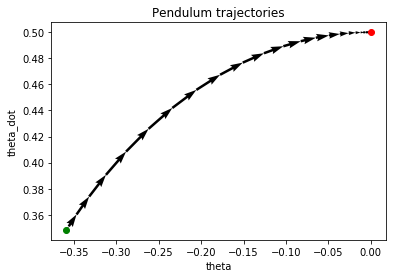

In [8]:
mto.plot_all_trajectories("state_scatter")
mto.plot_all_trajectories("state_quiver")
mto.plot_all_trajectories("tip_scatter")
mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

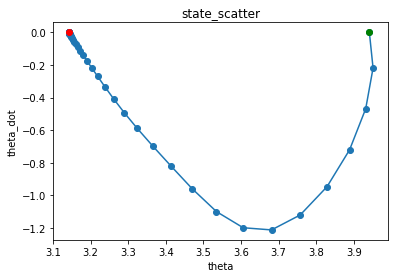

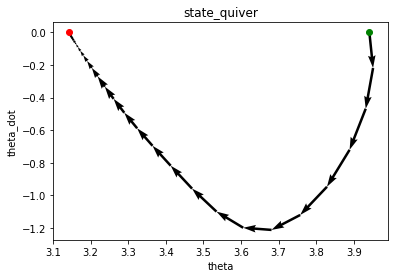

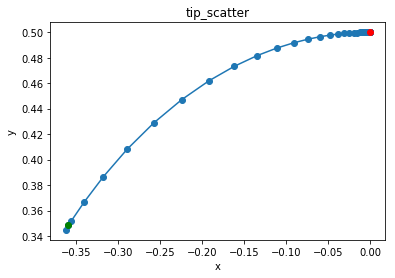

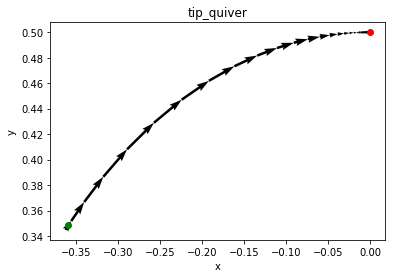

In [31]:
ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

mto.render_single_trajectory(ti)